In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Load the dataset
iris = pd.read_csv("Iris.csv")

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Data Cleaning and Preparation
iris.drop(columns='Id', inplace=True)  # Drop unnecessary 'Id' column
iris.rename(columns={
    'SepalLengthCm': 'Sepal_Length_Cm',
    'SepalWidthCm': 'Sepal_Width_Cm',
    'PetalLengthCm': 'Petal_Length_Cm',
    'PetalWidthCm': 'Petal_Width_Cm'
}, inplace=True)

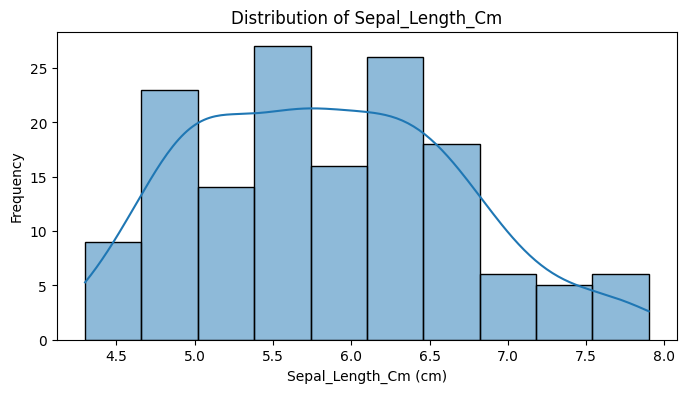

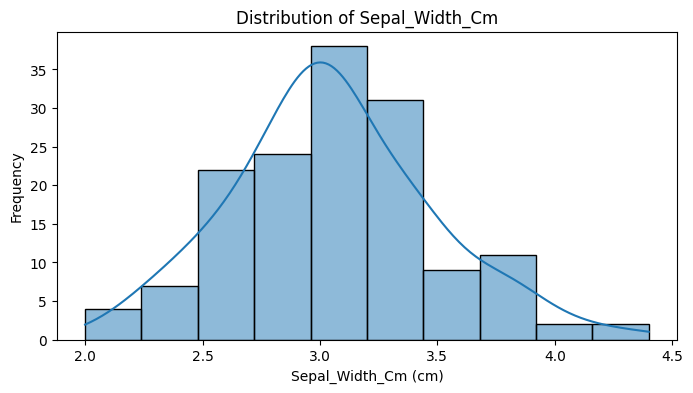

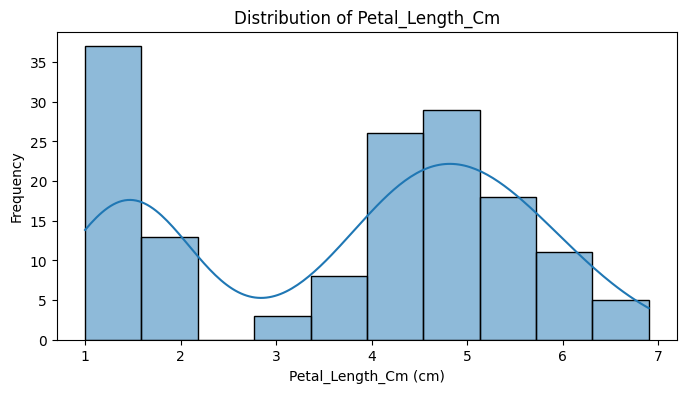

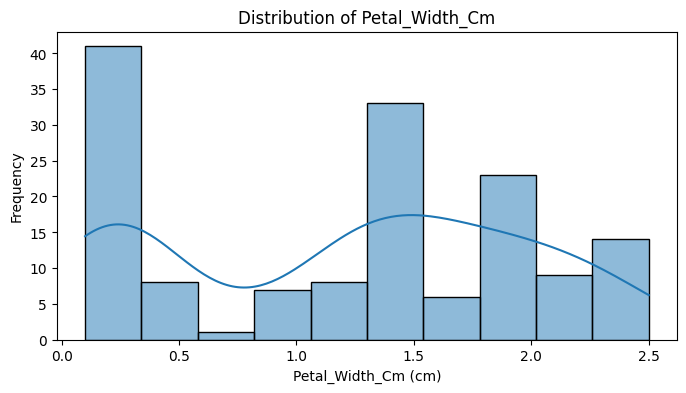

In [7]:
# Visualize the distribution of each feature
features = ['Sepal_Length_Cm', 'Sepal_Width_Cm', 'Petal_Length_Cm', 'Petal_Width_Cm']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(iris[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature} (cm)')
    plt.ylabel('Frequency')
    plt.show()

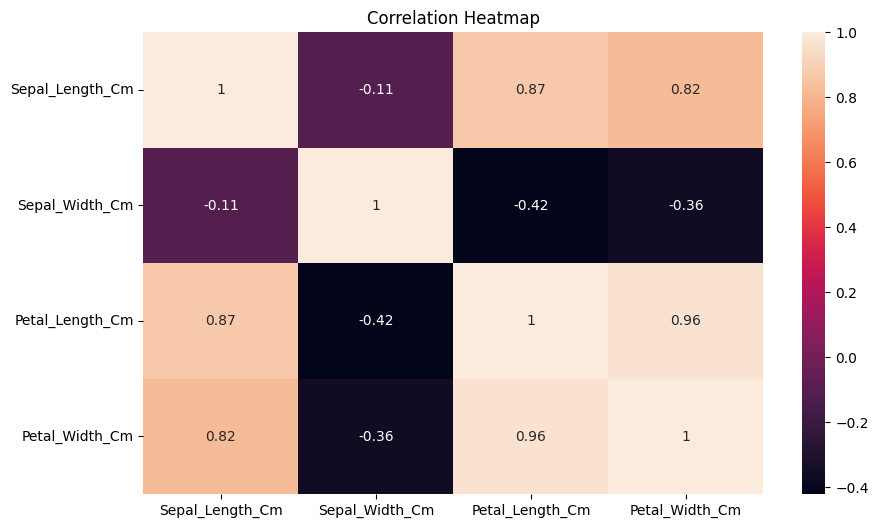

In [9]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_iris = iris.select_dtypes(include=[np.number])

# Calculate and visualize the correlation matrix
sns.heatmap(numeric_iris.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Split data into features (X) and target (y)
X = iris.drop(columns=['Species'])
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model Training and Evaluation
# 1. Support Vector Classifier (SVC)
svm = SVC(kernel='rbf', gamma=0.10, C=1.0, random_state=0)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [19]:
print("SVM Testing Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report for SVM:\n", classification_report(y_test, svm_preds))

SVM Testing Accuracy: 1.0
Classification Report for SVM:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



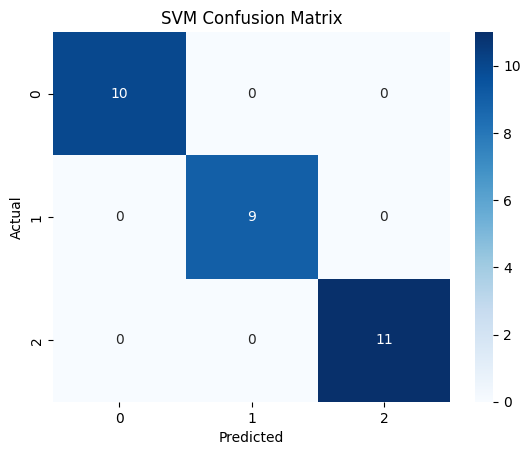

In [22]:
# Confusion Matrix for SVM
sns.heatmap(confusion_matrix(y_test, svm_preds), annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [26]:
print("KNN Testing Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report for KNN:\n", classification_report(y_test, knn_preds))

KNN Testing Accuracy: 1.0
Classification Report for KNN:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



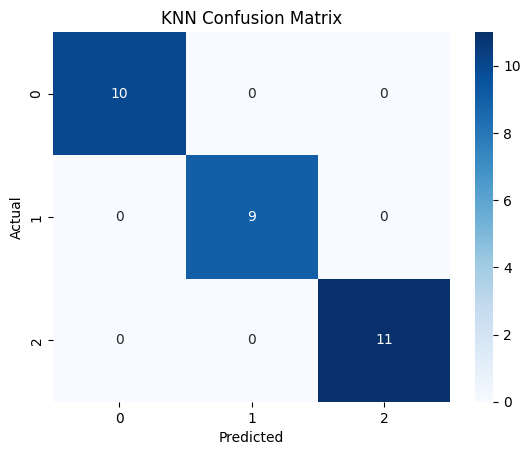

In [27]:
# Confusion Matrix for KNN
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Predict Species for New Data Points
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
predictions = knn.predict(X_new)
print("Predicted Species for New Data Points:", predictions)

Predicted Species for New Data Points: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
